## Fall 2021 Data Science Intern Challenge

By: Jenny Wang

### Question 1

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

#### a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib

In [2]:
orderData = pd.read_excel(r'C:\Users\jenni\Desktop\Shopify DS Intern Challenge\2019 Winter Data Science Intern Challenge Data Set.xlsx')

Averages can be easily skewed by outlier data, let's take a look at the order_amount column for any entries that look out of the ordinary. We'll make use of the .describe function pandas has available:

In [3]:
orderData['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

The given AOV matches the mean. Comparing the largest value (704000) to the median (284), it is evident that this value is skewing the mean to be much larger. This is also evident by looking at the absurdly large standard deviation (41282.539349). Taking a look at the top 10 largest orders, we can see that this order amount of 704000 is being repeated by the same shop and user.

In [4]:
orderData.nlargest(10, 'order_amount')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00


Looking at the counts of the top 15 unique order amounts:

In [5]:
orderData.groupby('order_amount')['order_amount'].count().reset_index(name='count').sort_values('order_amount', ascending=False).head(20)

,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


We see the amounts 704000, 154350, 102900, 77175, 51450, and 25725 representing the larger outlier orders with 704000, 77175, 51450, and 25725 being thoroughly repeated

In [6]:
orderData.loc[orderData['order_amount'] == 704000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00


In [7]:
orderData.loc[orderData['order_amount'] == 77175]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1259,1260,78,775,77175,3,credit_card,2017-03-27 09:27:19.843
2564,2565,78,915,77175,3,debit,2017-03-25 01:19:35.410
2690,2691,78,962,77175,3,debit,2017-03-22 07:33:25.104
2906,2907,78,817,77175,3,debit,2017-03-16 03:45:46.089
3403,3404,78,928,77175,3,debit,2017-03-16 09:45:04.544
3724,3725,78,766,77175,3,credit_card,2017-03-16 14:13:25.868
4192,4193,78,787,77175,3,credit_card,2017-03-18 09:25:31.863
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:34.551
4715,4716,78,818,77175,3,debit,2017-03-05 05:10:43.633


In [8]:
orderData.loc[orderData['order_amount'] == 51450]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
490,491,78,936,51450,2,debit,2017-03-26 17:08:18.911
493,494,78,983,51450,2,cash,2017-03-16 21:39:35.400
511,512,78,967,51450,2,cash,2017-03-09 07:23:13.640
617,618,78,760,51450,2,cash,2017-03-18 11:18:41.848
1529,1530,78,810,51450,2,cash,2017-03-29 07:12:01.466
2452,2453,78,709,51450,2,cash,2017-03-27 11:04:04.363
2495,2496,78,707,51450,2,cash,2017-03-26 04:38:52.497
2512,2513,78,935,51450,2,debit,2017-03-18 18:57:13.421
2818,2819,78,869,51450,2,debit,2017-03-17 06:25:50.921
2821,2822,78,814,51450,2,cash,2017-03-02 17:13:25.271


In [9]:
orderData.loc[orderData['order_amount'] == 25725]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:56.834
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:44.830
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:25.551
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21.438
1384,1385,78,867,25725,1,cash,2017-03-17 16:38:06.279
1419,1420,78,912,25725,1,cash,2017-03-30 12:23:42.551
1452,1453,78,812,25725,1,credit_card,2017-03-17 18:09:54.089
2270,2271,78,855,25725,1,credit_card,2017-03-14 23:58:21.635
2548,2549,78,861,25725,1,cash,2017-03-17 19:35:59.663
2773,2774,78,890,25725,1,cash,2017-03-26 10:36:43.445


We notice that the order amounts of 51450 and 77175 are just 2 times and 3 times the orders of 25725, respectively, by the same shop (since they all have the same shop_id of 78).
The order amount of 704000 appears to be buying large amounts of shoes, implying they might be a supplier with a consistent total_items of 2000, all ordered at 4:00 on each day. 

So, we have 2 shops with larger than average orders.

Using the IQR method to remove outliers, we can shrink our dataset:

In [10]:
q1 = orderData['order_amount'].quantile(q=0.25)
q2 = orderData['order_amount'].quantile(q=0.5) # median
q3 = orderData['order_amount'].quantile(q=0.75)
IQR = q3 - q1

In [11]:
IQR

227.0

In [12]:
cut_off = IQR * 1.5
orderDataCleaned = orderData[(orderData['order_amount'] < q2 + cut_off) & (orderData['order_amount'] > q2 - cut_off)]

In [13]:
orderDataCleaned.groupby('order_amount')['order_amount'].count().reset_index(name='count').sort_values('order_amount', ascending=False).head(20)

,order_amount,count
191,624,9
190,620,2
189,616,7
188,612,12
187,603,7
186,596,3
185,592,10
184,590,6
183,588,15
182,585,7


We can see that many of the large order amount entries have been filtered out!
Here are the before and after blox plots:

<AxesSubplot:>

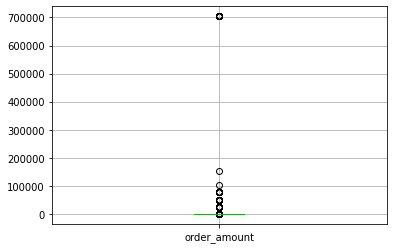

In [14]:
orderData.boxplot(column='order_amount')

<AxesSubplot:>

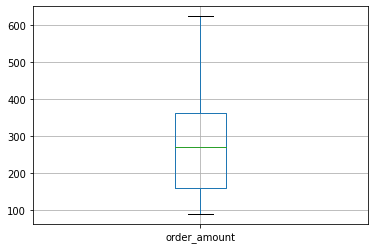

In [15]:
orderDataCleaned.boxplot(column='order_amount')

Here are the new values from .describe

In [16]:
orderDataCleaned['order_amount'].describe()

count    4738.000000
mean      283.814268
std       132.061996
min        90.000000
25%       161.000000
50%       272.000000
75%       362.000000
max       624.000000
Name: order_amount, dtype: float64

The new standard deviation of 132.061996 is now much more reasonable

#### b. What metric would you report for this dataset?

I would report the median of the dataset. Looking at the boxplot above, the data is still reletively bottom skewed, meaning that the mean could be inflated again. 

#### c. What is its value?

In [17]:
orderDataCleaned['order_amount'].describe()

count    4738.000000
mean      283.814268
std       132.061996
min        90.000000
25%       161.000000
50%       272.000000
75%       362.000000
max       624.000000
Name: order_amount, dtype: float64

We report a median value of $272

### Question 2

#### a. How many orders were shipped by Speedy Express in total?

The Orders table does not specify the shipper name, so we join it with the Shippers table on ShipperID to return the count

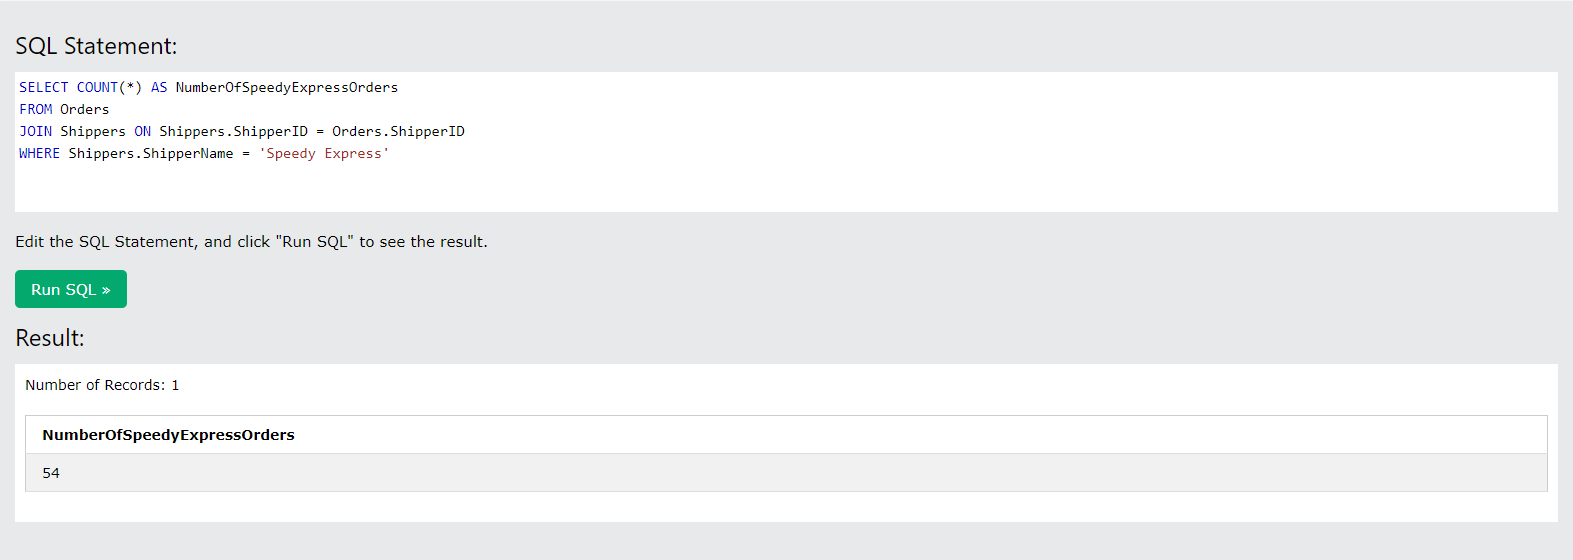

~~~~sql
SELECT COUNT(*) AS NumberOfSpeedyExpressOrders
FROM Orders
JOIN Shippers ON Shippers.ShipperID = Orders.ShipperID
WHERE Shippers.ShipperName = 'Speedy Express'
~~~~

We get a result of 54 shipments from Speedy Express

#### b. What is the last name of the employee with the most orders?

We join the Orders and Shippers tables on ShipperID and then return the top count
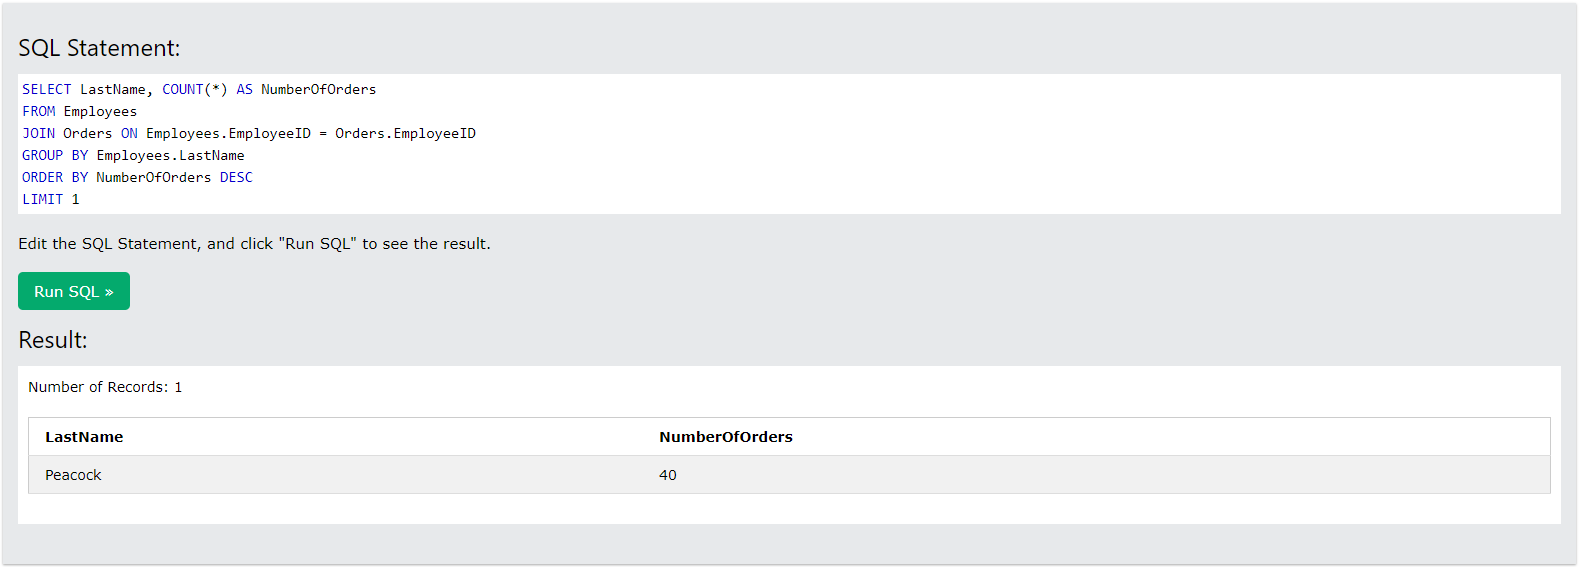

~~~~sql
SELECT LastName, COUNT(*) AS NumberOfOrders
FROM Employees 
JOIN Orders ON Employees.EmployeeID = Orders.EmployeeID
GROUP BY Employees.LastName
ORDER BY NumberOfOrders DESC
LIMIT 1
~~~~

The employee with 40 orders with the last name "Peacock" has the most orders

#### c. What product was ordered the most by customers in Germany?

We ultimately want to get a visual of the Product Name and the Amount of Orders (from people from Germany). We see that the "Product Name" is in the Products table and the "Country" is in the Customers table, so we JOIN Customers and Products with Orders and OrderDetails to connect the two tables and get the SUM of the Quantity. (Screenshot doesn't hold full query, full query can be seen below).


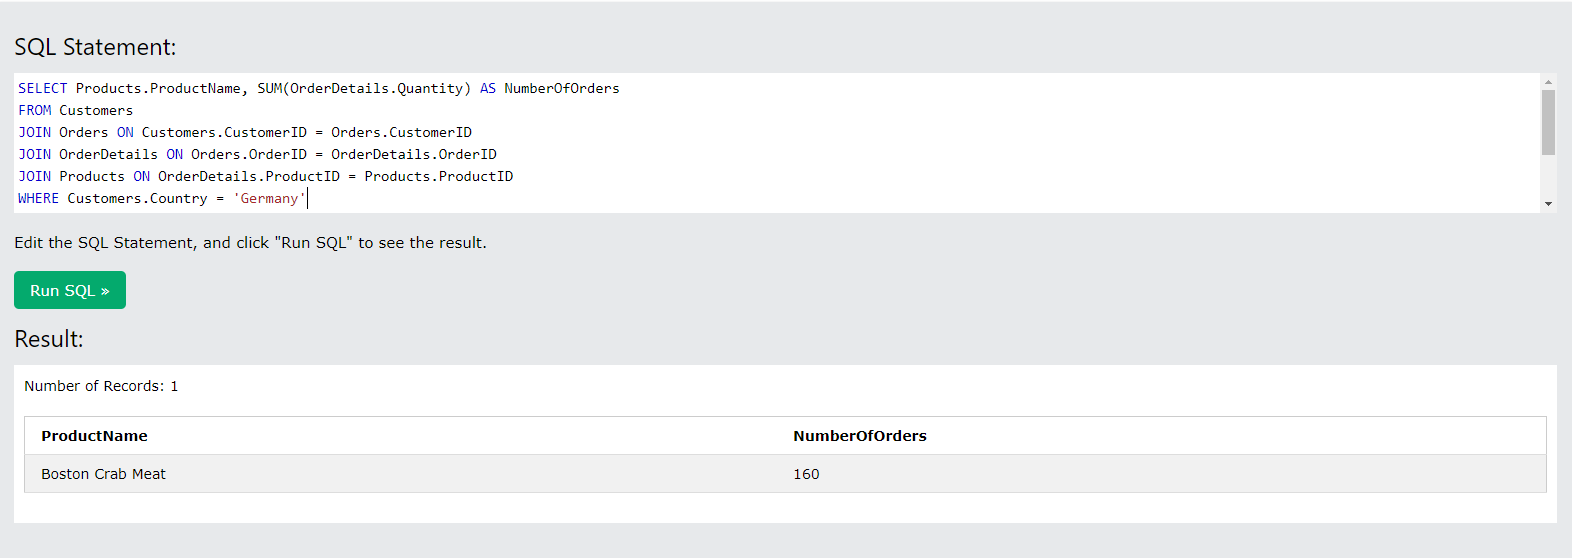

~~~~sql
SELECT Products.ProductName, SUM(OrderDetails.Quantity) AS NumberOfOrders
FROM Customers
JOIN Orders ON Customers.CustomerID = Orders.CustomerID
JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID
JOIN Products ON OrderDetails.ProductID = Products.ProductID
WHERE Customers.Country = 'Germany'
GROUP BY Products.ProductName
ORDER BY NumberOfOrders DESC
LIMIT 1
~~~~

We see that the product was ordered the most by customers in Germany is Boston Crab Meat (with 160 Orders)